In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import torch
import torch.nn as nn
import torch.nn.functional as F

from metric import mape, mae

### DATA

In [5]:
# data read
train_df = pd.read_csv('./data/train.csv', encoding='cp949')
test_df = pd.read_csv('./data/pre_test01.csv', encoding='cp949')

In [6]:
train_df

,num,date_time,elec_amount,temp,wind_speed,humidity,rainfall,sunshine,no_elec,sunlight_have
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1,1
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1,1
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1,1
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1,1


In [ ]:
# trn, tst data split

- check the gragh

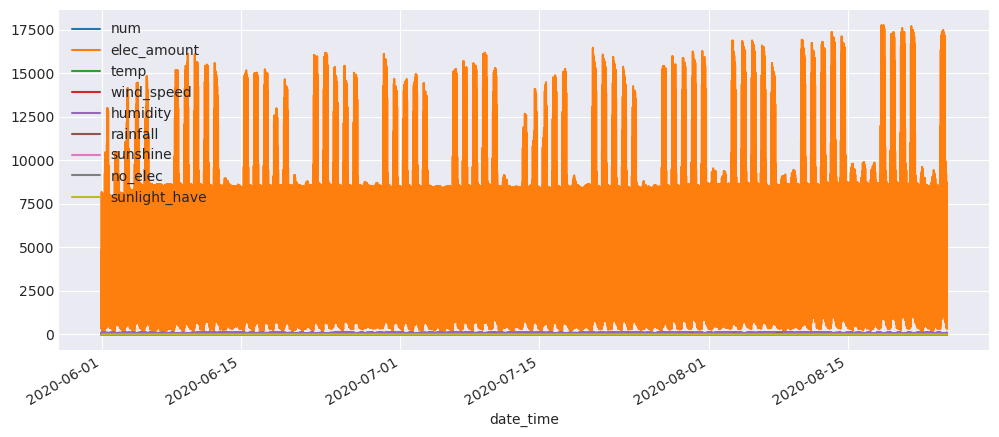

In [5]:
train_df.plot(figsize=(12, 5))
plt.show()

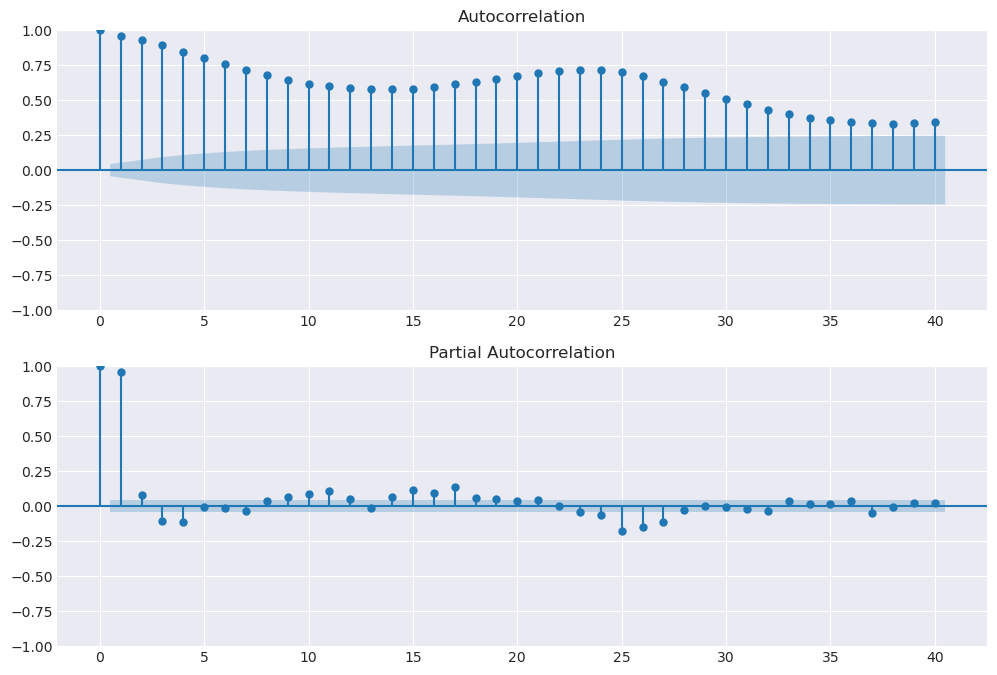

In [8]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trg.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trg.values.squeeze(), lags=40, ax=ax2)

In [9]:
adf = adfuller(trg)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -5.900663958166353
p-value: 2.7830681400304026e-07
Critical Values:
	1%: -3.4336026867364144
	5%: -2.8629768669694458
	10%: -2.5675349256978177


In [11]:
trn, tst = trg[1900:-30], trg[-30:]
len(tst)

30

### ARIMA

- Auto ARIMA

In [7]:
from pmdarima.arima import auto_arima

model_auto = auto_arima(trn, start_p=0, start_q=0, max_d=3, max_p=15, max_q=15, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1044.749, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1029.339, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1033.545, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1042.752, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1030.535, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1030.883, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1032.229, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1027.339, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1028.535, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1028.883, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1031.546, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1030.229, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.905 seconds


/home/ubuntu/miniconda3/envs/MathAI/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/envs/MathAI/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/envs/MathAI/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/envs/MathAI/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/miniconda3/envs/MathAI/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47049 (\N{HAN

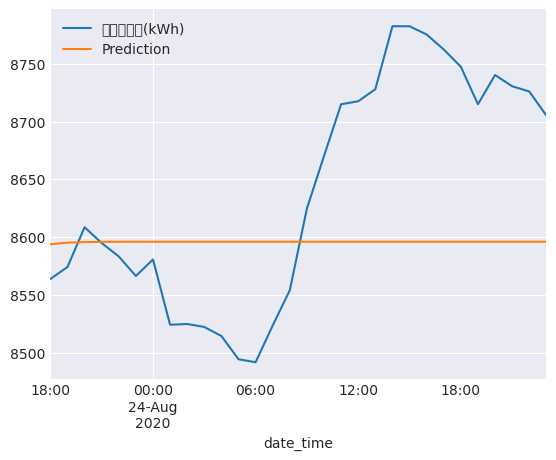

(1.044385797431192, 90.65957877720182)

In [10]:
prd = model_auto.predict(30)

tst.plot()
prd.plot(label="Prediction")
plt.legend()
plt.show()

mape(prd,tst), mae(prd,tst)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

model_auto.resid().plot(title="Residuals", ax=ax[0])
model_auto.resid().plot(kind='kde', title="Density", ax=ax[1])
plt.show()

- EDA for ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trn.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trn.values.squeeze(), lags=40, ax=ax2)

adf = adfuller(trn)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

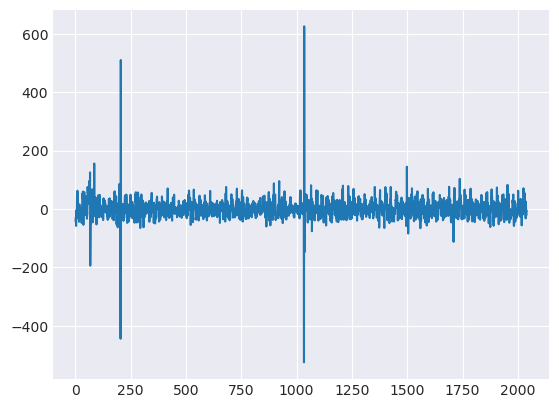

In [11]:
# diff
trg.diff(1).plot(label="Diff(1)")
plt.show()

In [14]:
adf = adfuller(trg.diff(1).dropna())
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -8.993808984853821
p-value: 6.779305547432339e-15
Critical Values:
	1%: -3.4336026867364144
	5%: -2.8629768669694458
	10%: -2.5675349256978177


In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trn.diff(1).dropna().values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trn.diff(1).dropna().values.squeeze(), lags=40, ax=ax2)

adf = adfuller(trn.diff(1).dropna())
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

- Manual ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

trn, tst = data.SUNACTIVITY[:-tst_size], data.SUNACTIVITY[-tst_size:]
arma_mod90 = ARIMA(trn, order=(9,0,0)).fit() # AR(9)

In [ ]:
prd = arma_mod90.predict("1989", "2008", dynamic=True)

plt.title(f"AR(9), MAPE:{mape(prd, tst):.4f}, MAE:{mae(prd, tst):.4f}")
tst.plot(label="Target")
prd.plot(label=f"Prediction")
plt.legend()
plt.show()